

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### The dataset that will be investigated is the TMDb movie data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### The investigation process is set to answer the following questions:
#### Q1: Which movie had the highest profit of all time?
#### Q2: Is there an increase in movie production throughout the years?
#### Q3: Which year has the biggest number of movie releases?
#### Q4: Which movie has the highest buget?
#### Q5:What are the top 6 most profitable movies?
#### Q6: Are movies' runtime in current times shorter than in the past?
#### Q7: What is the correlation between profit and popularity?
#### Q8 Which movie has the lowest profit in the given dataset? 
#### Q9 Which month has the highest number of movie releases?


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

This provides information on the data types of the columns and the number of rows for each column 

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This provides a statistical overview of the dataset

In [8]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

The list function here listed the columns' names that are present in the dataset. here is a simple description to each column
id: the identification number referring to each movie
imdb_id: identification number for the movie in the imdb website
popularity: refers to the movie being liked by the audience
budget: how much the movie cost
revenue: how much the movie earned after being released
original_title: which refers to the movie title
cast: actors in the movie
homepage: a url that takes you to the movie's website
director: the name of the director who directed the movie
tagline: a short text which serves to clarify an idea for a dramatic effect
overview: is a quick movie summary
runtime: the duration of the movie
genres: they are categories that define the nature of a movie(ex: comedy, romance,...etc)
production_companies: the name of the companies that played a role in the production of the movie 
release_date: refers to a fixed date to when  the movie is released
vote_count: users votes that is later summarized in the movie's rating
vote_average: average of counts
release_year: refers to the year in which the movie is released 
budget_adj: A Budget Adjustment is used to record both income and expense transaction changes against an existing budget.
revenue_adj: Adjusted Revenue means revenues generated by the Operators at the Projects for the period in question (and if none specified, then for the most current twelve (12) months), as determined under GAAP, but excluding (a) nonrecurring income and non-property related income (as determined by Administrative Agent in its sole discretion) and income from tenants that is classified as “bad debt” under GAAP, and (b) late fees and interest income; provided, however, if actual occupancy of the Projects, taken as a whole, exceeds 95%, Adjusted Revenue shall be proportionately reduced assuming an occupancy of 95%.

(Adjusted revenue reference:https://www.lawinsider.com/dictionary/adjusted-revenue#:~:text=Adjusted%20Revenue%20means%20revenues%20generated,Administrative%20Agent%20in%20its%20sole)

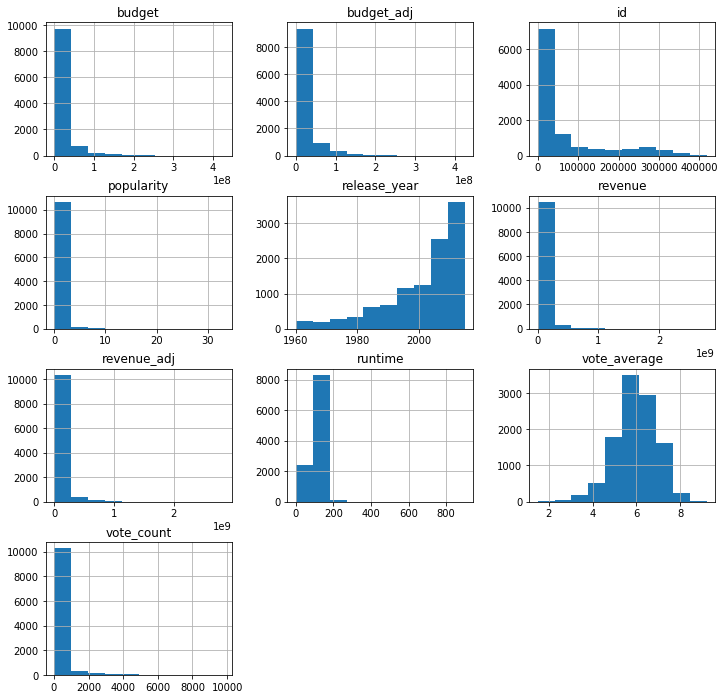

In [83]:
df.hist(figsize = (12,12));


The histograms give us a better visualization of the data


### Data Cleaning

 

In [9]:
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

It appears that there are 9 out of the 21 columns are missing some values

In [10]:
 df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Here the missing values are replaced with the value 0. Thus, we have no more missing values in our dataset

In [12]:
df.duplicated().sum()

1

It appears that there are duplicated values in the dataset

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

Here the duplicated value is deleted, and we recreated the step of the duplication function to check if it was still there.

<a id='eda'></a>
## Exploratory Data Analysis


## Q1: Which movie had the highest profit of all time?


In [15]:
df['profit']= df['revenue'] - df['budget']

First we need to create a profit column to be able to answer the question. In order to know the profit will have to subtract the budget from the movie earnings which is the movie revenue.

In [16]:
 df.profit.max()

2544505847

This is the highest profit present in the given dataset. 

In [17]:
pd.DataFrame(df.loc[df['profit'] == 2544505847])


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847


The location function is used to get more information on the highest profit, for example: when was the movie with the highest profit was released?, what is the name of the movie with the highest profit,...etc. 


In [18]:
df.revenue_adj.max()

2827123750.41189

In [19]:
pd.DataFrame(df.loc[df['revenue_adj'] == 2827123750.41189])


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847


### According to the output, the movie "Avatar" has the highest profit in the given dataset. "Avatar" was released in 2009 with a profit that is over 2 Billion dollars. 

## Q2: Is there an increase in movie production throughout the years?

In [20]:
number_of_movies_each_year = df.groupby('release_year').count()['original_title']
print(number_of_movies_each_year)


release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64


 Here we want to see how many movies were released in each of the following year. 

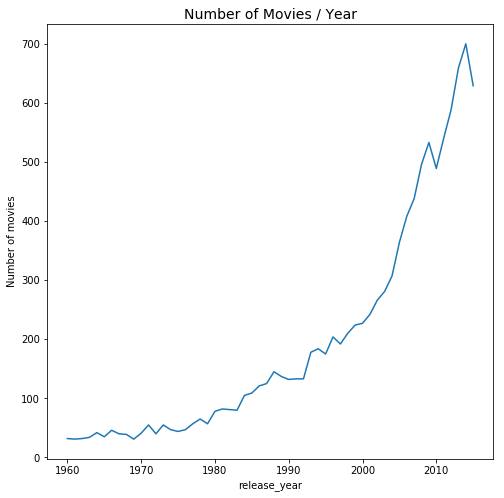

In [21]:
number_of_movies_each_year.plot(kind='line',  figsize =(8,8));
plt.title("Number of Movies / Year",fontsize = 14);
plt.ylabel('Number of movies');


### It can be seen from the graph shown that the production of movies has increased throughout the years.

## Q3 Which year has the biggest number of movie releases?

In [22]:
number_of_movies_each_year = df.groupby('release_year').count()['original_title']
print(number_of_movies_each_year.tail(6))

release_year
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64


According the the graph of Q2, the highest numbers of movies released are post 2010. We need to see the number of movies of the last 5 years to get the highest year with the highest releases. We needed to check the last 5 rows(= last 5 years) for that. 

### The year with the highest movie releases is 2014.

## Q4 Which movie has the highest budget? 

In [23]:
df.budget.max()

425000000

In [24]:
pd.DataFrame(df.loc[df['budget'] == 425000000])

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0,-413912431


### The movie with the highest budget is "The Warrior's Way" that is directed by Sngmoo Lee and was released in 2010.

## Q5 What are the top 6 most profited movies?

In [25]:
df['profit'].nlargest(n=6)

 

1386    2544505847
3       1868178225
5231    1645034188
0       1363528810
4       1316249360
4361    1299557910
Name: profit, dtype: int64

Here from the column 'profit' we used a function on it that picks the largest 5 numbers. 

In [26]:
pd.DataFrame(df.loc[df['profit'] >= 1299557910].sort_values(by=['profit'], ascending=False))


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,1299557910


To get more information on the the largest five profits, we located them in the dataset using the .loc function, and made sure that the values were from highest to lowest and this was through sorting_values(by='column name') and ascending=False. 


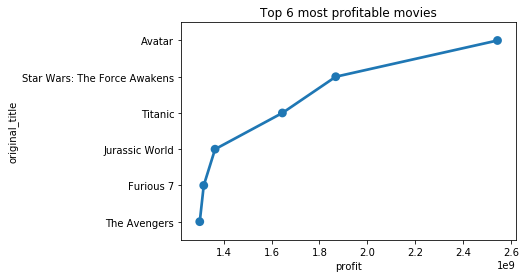

In [27]:
sns.pointplot(x='profit',y='original_title', data=df.nlargest(6, 'profit'));
plt.title('Top 6 most profitable movies');

### According to the table, we can see that the top 6 most profited movies are: 
### 1- "Avatar" - 2009
### 2- "Star Wars: The Force Awakens" - 2015
### 3- "Titanic" - 1997
### 4- "Jurassic World" - 2015
### 5- "Furious 7" - 2015
### 6- "The Avengers" - 2012

## Q6 Are movies' runtime in current times shorter than in the past?

In [28]:
runtime_per_year = df.groupby('release_year').mean()['runtime']
runtime_per_year

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    104.950000
1968    107.282051
1969    106.580645
1970    112.048780
1971    107.727273
1972    101.950000
1973    103.527273
1974    105.617021
1975    107.363636
1976    109.319149
1977    107.105263
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    103.466667
1985    114.339450
1986     99.933884
1987    101.168000
1988    101.793103
1989    104.781022
1990    105.651515
1991    105.112782
1992    107.030075
1993    107.123596
1994    106.913043
1995    107.548571
1996    105.705882
1997    106.505208
1998    105.061905
1999    108.861607
2000    103.779736
2001    108.033058
2002    106.864662
2003    100.679715
2004    105.364821
2005    102.686813
2006    101.683824
2007    100.410959
2008    100.280242
2009     98.050657
2010     98.132924
2011     97.922222

The output shows the average runtime of movies in each year

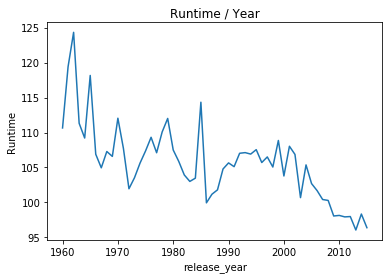

In [29]:
runtime_per_year.plot(xticks = np.arange(1960,2016,10));
plt.title('Runtime / Year');
plt.ylabel('Runtime');

### According to the graph, we can see that the average runtime of movies mostly are shorter in modern period than than in the past.

### Q7: What is the correlation between profit and popularity?

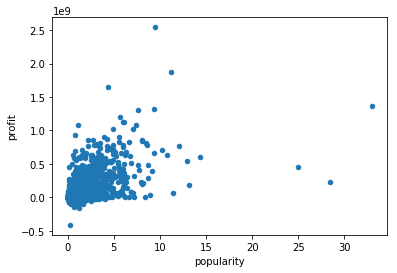

In [30]:
df.plot(x='popularity', y='profit', kind='scatter');

In [31]:
data_correlation = df.corr()
data_correlation.loc['profit', 'popularity']

0.6289972839642362

The correlation between the profit and popularity seems to be 0.6289972839642362


## Q8 Which movie has the lowest profit in the given data set?

In [33]:
def find_minimum(x):
    min_profit = df[x].idxmin()
    low = pd.DataFrame(df.loc[min_profit,:])
    return pd.concat([low],axis = 1)
find_minimum('profit')

,2244
id,46528
imdb_id,tt1032751
popularity,0.25054
budget,425000000
revenue,11087569
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.iamrogue.com/thewarriorsway
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.


It can be seen from the output that the movie with the lowest profit is "The Warrior's way" that was released in 2010. 

## Q9 Which month had the highest movie releases?

In [78]:
df['release_date'] = pd.to_datetime(df['release_date'])

month_release = df['release_date'].dt.month

First we need to convert the release date from a string to datetime, and then we extract the month number from the release date given using the .dt.month.


In [79]:
number_of_releases = month_release.value_counts().sort_index()
months=['January','February','March','April','May','June','July','August','September','October','November','December']
number_of_releases = pd.DataFrame(number_of_releases)
number_of_releases['month'] = months

Here we are counting the movies per month using the .value_counts() function

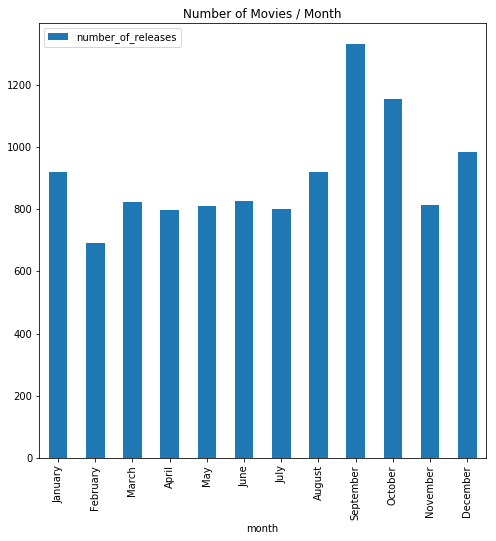

In [81]:
number_of_releases.rename(columns = {'release_date':'number_of_releases'},inplace=True)
number_of_releases.plot(x='month',kind='bar',figsize=(8,8));
plt.title('Number of Movies / Month');



Accordingly, September is set to be the month with the highest movie releases.

## Q10 What is the most famous genre ?

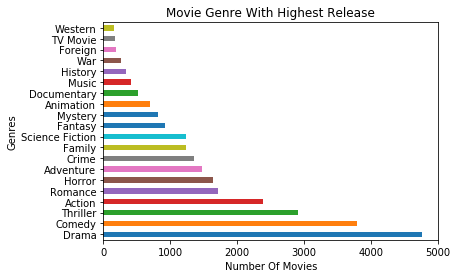

In [75]:
def count_genre(x):
    df_plot = df[x].str.cat(sep = '|')
    data = pd.Series(df_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres')
total_genre_movies.plot(kind= 'barh', subplots=True);
plt.title('Movie Genre With Highest Release');
plt.xlabel('Number Of Movies');
plt.ylabel('Genres');

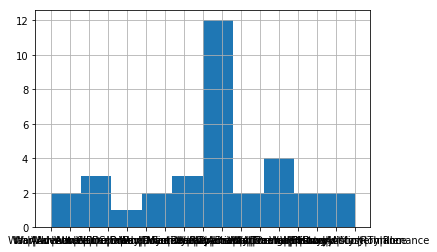

In [ ]:
Accordin

# Conclusions
#### Q1: Which movie had the highest profit of all time? 
##### The movie Avatar has the highest profit of all time in the given dataset. It was released in 2009 with a profit over 2 Bn dollars.

#### Q2: Is there an increase in movie production throughout the years? 
##### It can be seen from the graph shown that the production of movies has increased throughout the years.

#### Q3: Which year has the biggest number of movie releases?
##### The year with the highest movie releases is 2014.

#### Q4: Which movie has the highest buget? 
##### The movie with the highest budget is "The Warrior's Way" that is directed by Sngmoo Lee and was released in 2010.

#### Q5:What are the top 6 most profitable movies?
##### According to the table, we can see that the top 6 most profited movies are:
##### 1- "Avatar" - 2009
##### 2- "Star Wars: The Force Awakens" - 2015
##### 3- "Titanic" - 1997
##### 4- "Jurassic World" - 2015
##### 5- "Furious 7" - 2015
##### 6- "The Avengers" - 2012

#### Q6:Are movies' runtime in current times shorter than in the past?
##### According to the graph, we can see that the average runtime of movies mostly are shorter in modern period than than in the past.

#### Q7: What is the correlation between profit and popularity?
##### The correlation between the profit and popularity seems to be 0.6289972839642362

#### Q8 Which movie has the lowest profit in the given dataset? 
##### It can be seen from the output that the movie with the lowest profit is "The Warrior's way" that was released in 2010.

#### Q9 Which month has the highest number of movie releases?
##### Accordingly, September is set to be the month with the highest movie releases.


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

> **Limitations**:
The analysis that is provided is only based on the given information at the time of the .csv file creation. The information is bound to change if other data is added that will affect the profits, budget and revenue numbers. In addition, if new movies with higher numbers are added, the whole process needs to be redone becuase the results will for sure change.
